In [1]:
import pickle
import pandas as pd
import numpy
import re
import os
import numpy as np
import gensim
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# get pickled doc2vec model
with open('clean_df.pkl', 'rb') as f:
    clean_poem_df = pickle.load(f)
    
doc2vec_model = gensim.models.doc2vec.Doc2Vec.load("poem_doc2vec_dbow500.pkl")

In [3]:
clean_poem_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15076 entries, 1 to 15651
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   author             15076 non-null  category
 1   title              15076 non-null  object  
 2   content            15076 non-null  object  
 3   line               15076 non-null  object  
 4   length_in_lines    15076 non-null  int64   
 5   lexical_diversity  15076 non-null  float64 
 6   words              15076 non-null  object  
dtypes: category(1), float64(1), int64(1), object(4)
memory usage: 879.8+ KB


In [4]:
poems = clean_poem_df.words.to_list()
# poems = [' '.join(poem).split() for poem in poems]
poems[0]

['philosophic',
 'in',
 'its',
 'complex',
 'ovoid',
 'emptiness',
 'a',
 'skillful',
 'pundit',
 'coined',
 'it',
 'as',
 'a',
 'sort',
 'of',
 'stopgap',
 'doorstop',
 'for',
 'those',
 'quaint',
 'equations',
 'romans',
 'never',
 'dreamt',
 'of',
 'in',
 'form',
 'completely',
 'clever',
 'and',
 'discretea',
 'mirror',
 'come',
 'unsilvered',
 'loose',
 'watch',
 'face',
 'without',
 'the',
 'works',
 'a',
 'hollowed',
 'globe',
 'from',
 'tip',
 'to',
 'toe',
 'unbroken',
 'it',
 'evades',
 'the',
 'grappling',
 'hooks',
 'of',
 'mass',
 'tilts',
 'the',
 'thin',
 'rim',
 'of',
 'no',
 'thing',
 'remains',
 'embryonic',
 'sum',
 'noncogito']

In [5]:
poem_vector=[]

t = 1000

for i in range(len(poems)):
    if i % t == 0:
        print("poem", i, ":", poems[i[:3]])
        print("***")
    poem = poems[i]
    poem_vector.append(doc2vec_model.infer_vector(poem))
    
#save the lines_vector
poem_vector_file = "poem_vector_500.pkl"
with open(poem_vector_file, 'wb') as f:
    pickle.dump((poem_vector), f)

poem 0 : ['philosophic', 'in', 'its', 'complex', 'ovoid', 'emptiness', 'a', 'skillful', 'pundit', 'coined', 'it', 'as', 'a', 'sort', 'of', 'stopgap', 'doorstop', 'for', 'those', 'quaint', 'equations', 'romans', 'never', 'dreamt', 'of', 'in', 'form', 'completely', 'clever', 'and', 'discretea', 'mirror', 'come', 'unsilvered', 'loose', 'watch', 'face', 'without', 'the', 'works', 'a', 'hollowed', 'globe', 'from', 'tip', 'to', 'toe', 'unbroken', 'it', 'evades', 'the', 'grappling', 'hooks', 'of', 'mass', 'tilts', 'the', 'thin', 'rim', 'of', 'no', 'thing', 'remains', 'embryonic', 'sum', 'noncogito']
***
poem 1000 : ['i', 'need', 'them', 'true', 'to', 'life', 'and', 'so', 'i', 'shoot', 'them', 'as', 'many', 'as', 'fill', 'the', 'field', 'at', 'dawn', 'and', 'then', 'fix', 'wires', 'to', 'prop', 'them', 'as', 'if', 'feeding', 'their', 'young', 'or', 'bending', 'to', 'the', 'river', 'why', 'make', 'a', 'little', 'book', 'when', 'they', 'exist', 'lifesized', 'can', 'be', 'etched', 'to', 'stand', 

In [25]:
# store vectors for convenience
X = np.vstack(poem_vector)
print(type(X))

<class 'numpy.ndarray'>


In [29]:
# perform normalization and PCA and output components
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize
X_normalized = pd.DataFrame(normalize(StandardScaler().fit_transform(X)))

pca_99 = PCA(n_components = 0.99)
pca_99.fit(X_normalized)
reduced = pca_99.transform(X_normalized)

X_pc = PCA(n_components = 2).fit_transform(X_normalized)
X_principal = pd.DataFrame(X_pc)
X_principal.columns = ['P1', 'P2']

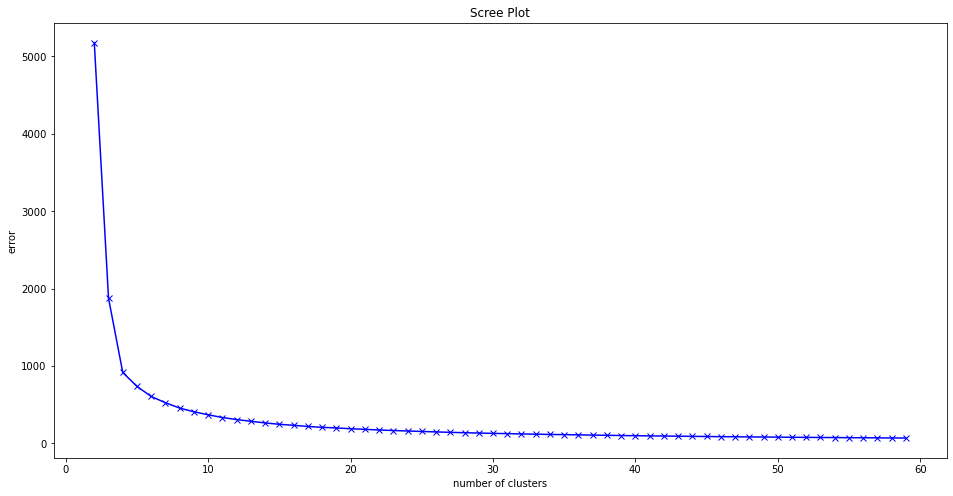

In [54]:
# determine best number of clusters for KMeans Clustering
from sklearn.cluster import KMeans
to_fit = X_principal
error = []
num_cluster_range = range(2,60)
for num_cluster in num_cluster_range:
    k_mean_model = KMeans(n_clusters=num_cluster, init = 'k-means++')
    k_mean_model.fit(to_fit)
    error.append(k_mean_model.inertia_)
plt.figure(figsize=(16,8))
plt.plot(num_cluster_range, error, 'bx-')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.title('Scree Plot')
plt.show()

6


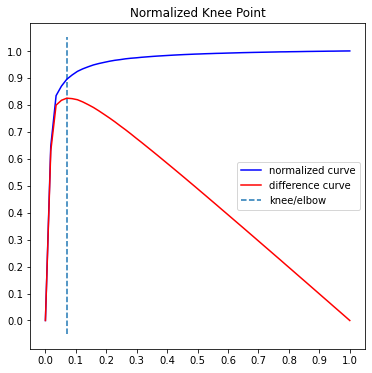

In [137]:
from kneed import KneeLocator
kn = KneeLocator(num_cluster_range, error, curve='convex', direction='decreasing')
print(kn.knee)
kn.plot_knee_normalized()

For n_clusters = 2 The average silhouette_score is : 0.6219193487585976
For n_clusters = 24 The average silhouette_score is : 0.3651078376575061
For n_clusters = 46 The average silhouette_score is : 0.3587465495965997
For n_clusters = 68 The average silhouette_score is : 0.36057880682094673
For n_clusters = 90 The average silhouette_score is : 0.3607161218772322
For n_clusters = 112 The average silhouette_score is : 0.3328357791054004
For n_clusters = 134 The average silhouette_score is : 0.32990144326070336
For n_clusters = 156 The average silhouette_score is : 0.3333485785386244
For n_clusters = 178 The average silhouette_score is : 0.33305073549187986
For n_clusters = 200 The average silhouette_score is : 0.33220513588891365


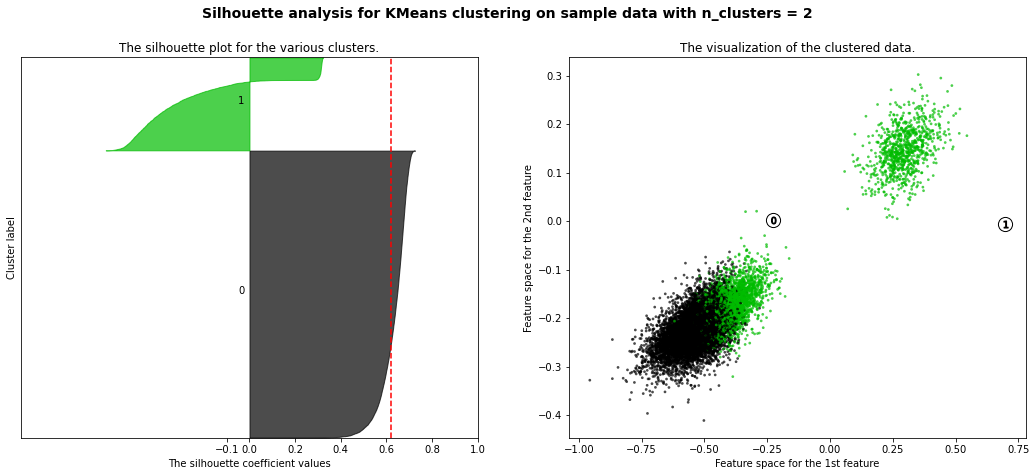

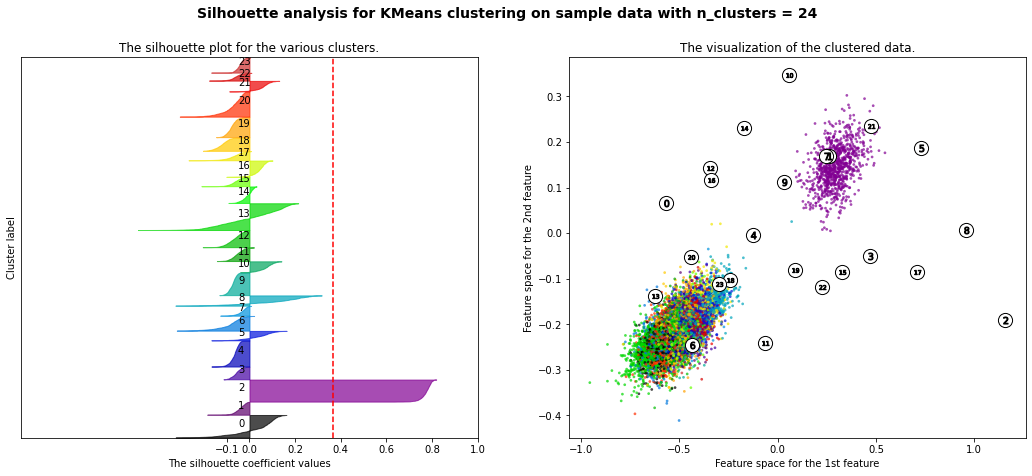

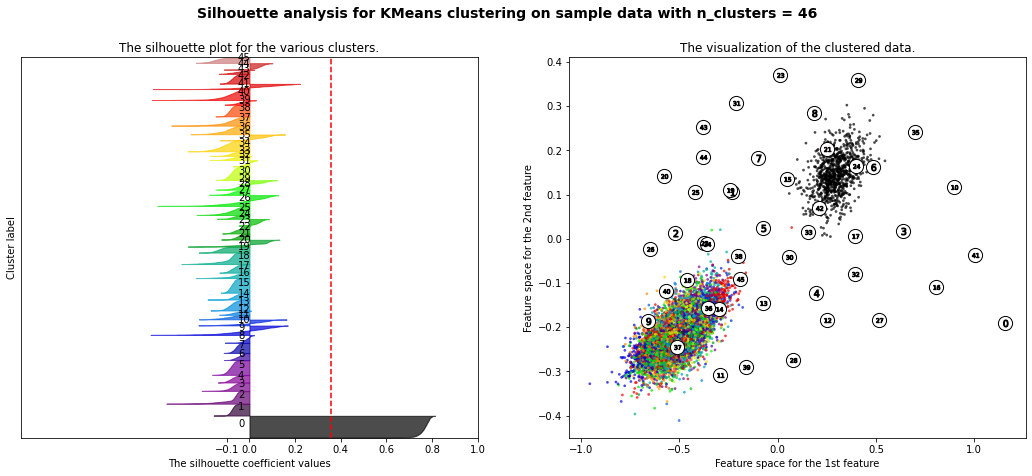

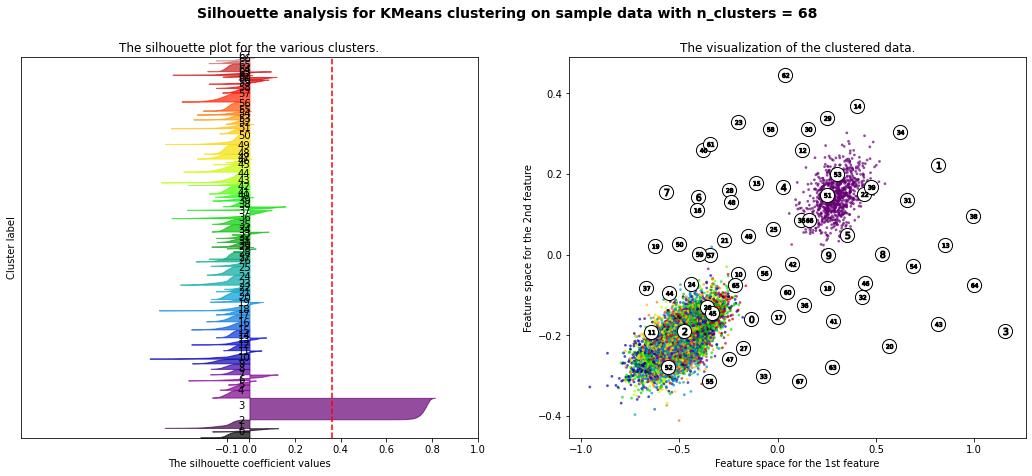

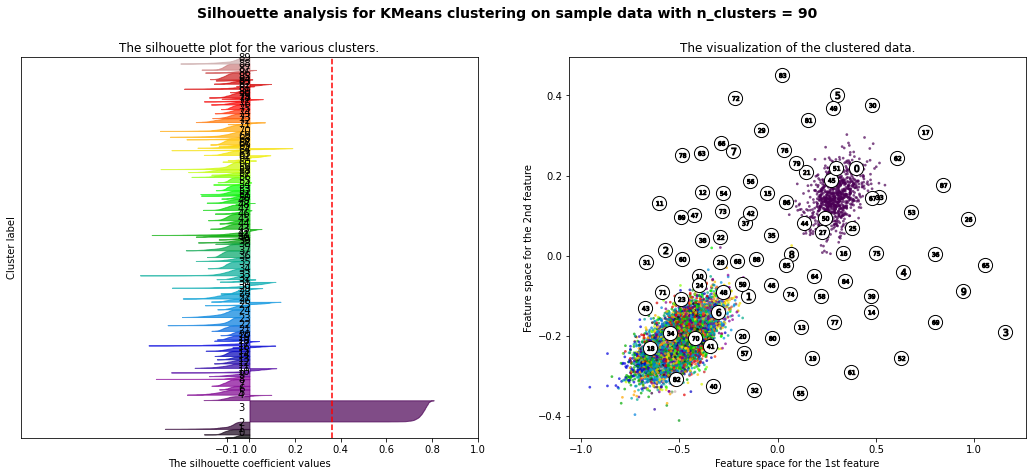

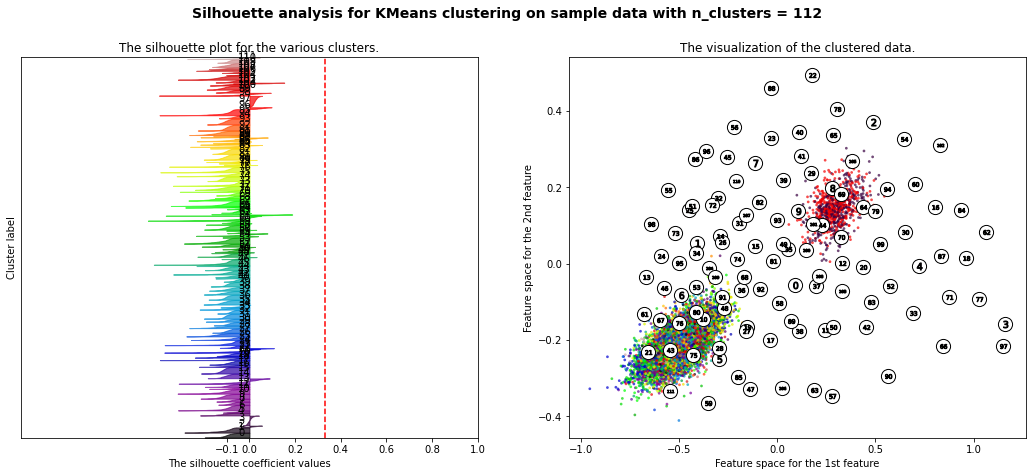

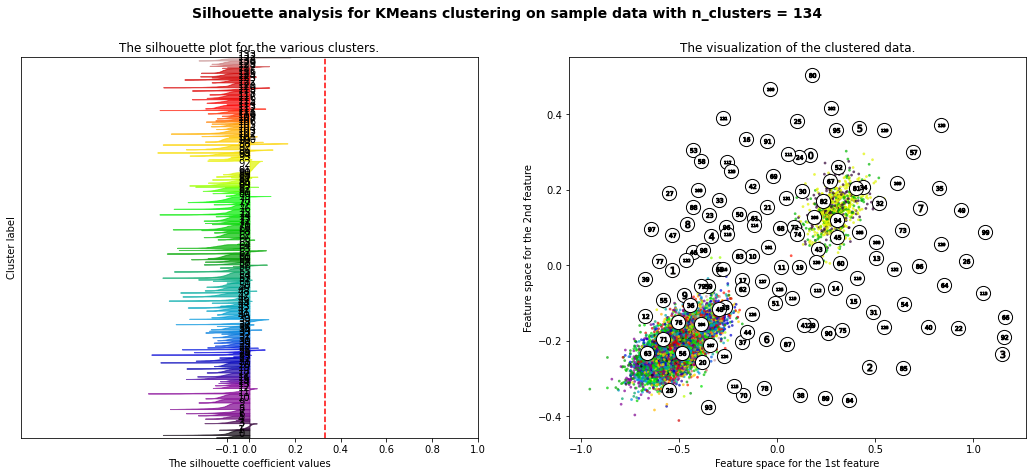

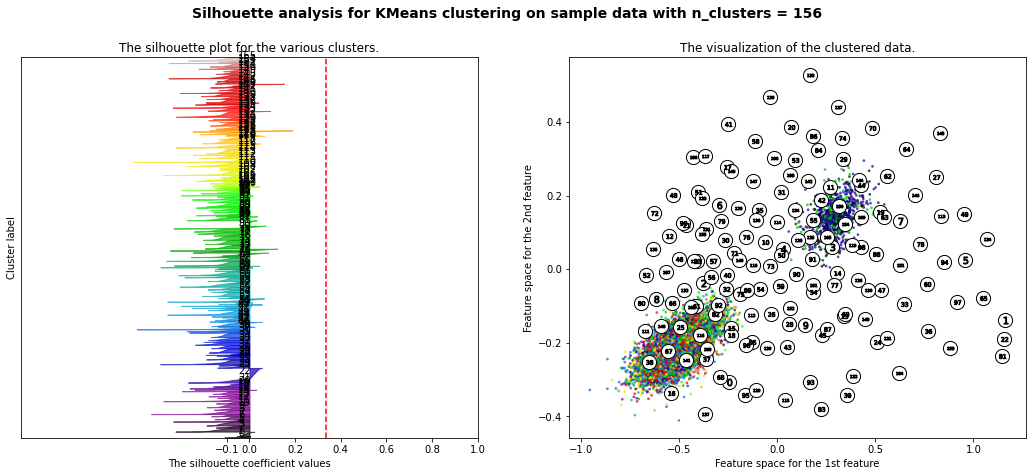

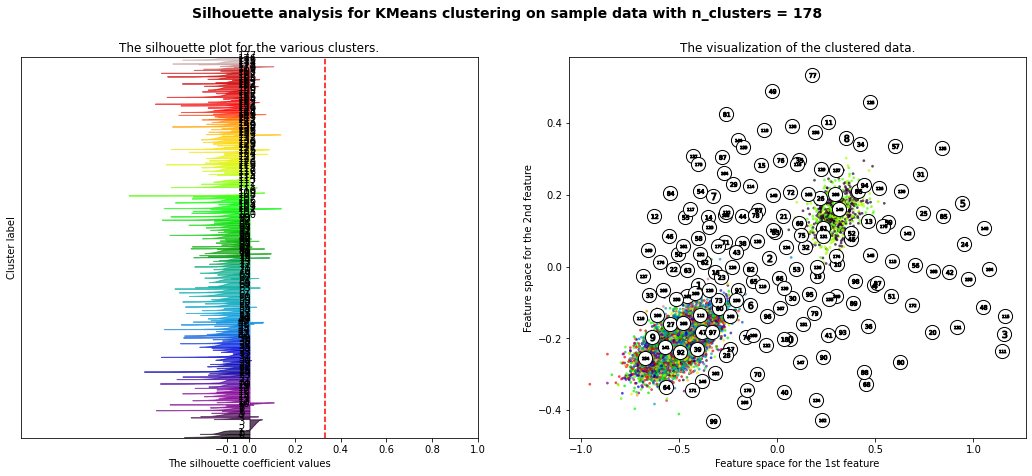

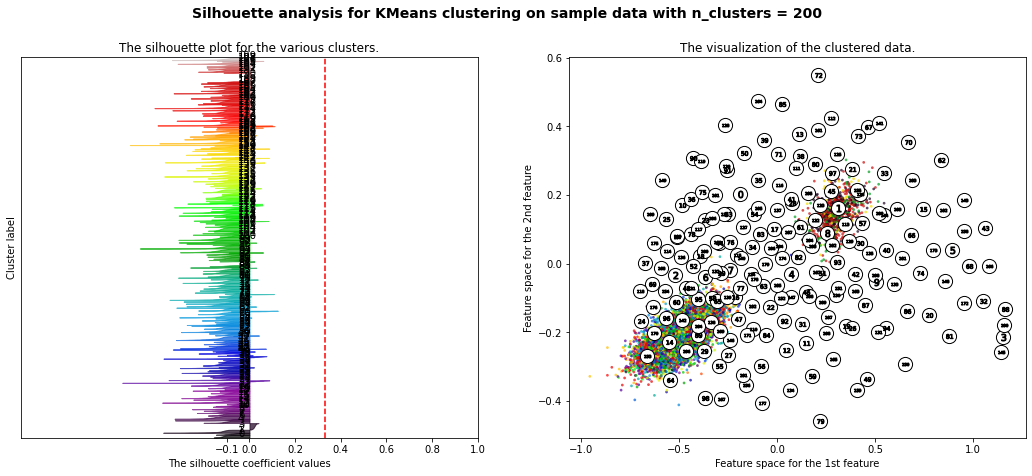

In [63]:
# from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# y = clean_poem_df.title
range_n_clusters = [int(i) for i in np.linspace(2,200,num=10, endpoint=True).tolist()]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(to_fit)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(to_fit, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [88]:
from sklearn.neighbors import NearestNeighbors
knn_model = NearestNeighbors(n_neighbors=2)
nbrs = knn_model.fit(X_principal)
distances, indices = nbrs.kneighbors(X_principal)

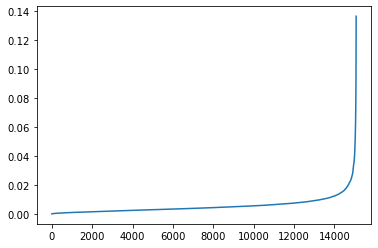

In [89]:
distances = np.sort(distances, axis=0)
distances1 = distances[:,1]
plt.plot(distances1)

In [145]:
df = pd.DataFrame(distances).iloc[:,1]

In [146]:
df = df.reset_index()
df.columns = ['id','distance']
print(df.head())

   id  distance
0   0  0.000023
1   1  0.000023
2   2  0.000027
3   3  0.000027
4   4  0.000042


   index  distance
0      0  0.000023
1      1  0.000023
2      2  0.000027
3      3  0.000027
4      4  0.000042


In [147]:
sensitivity = [1, 3, 5, 10, 100, 200, 400]

# hold knee points for each sensitivity
knees = []
norm_knees = []

# S should be chosen as a function of how many points are in the system (n)
n = 1000
x = df.id
y = df.distance
for s in sensitivity:
    kl = KneeLocator(x, y, curve='convex', direction='increasing', S=s)
    knees.append(kl.knee)
    norm_knees.append(kl.norm_knee)

print(f'Knees: {knees}')

print(f'Normalized Knees: {[nk.round(2) for nk in norm_knees]}')

Knees: [15069, 14647, 14264, 14150, 12623, 12623, 12623]
Normalized Knees: [0.0, 0.03, 0.05, 0.06, 0.16, 0.16, 0.16]


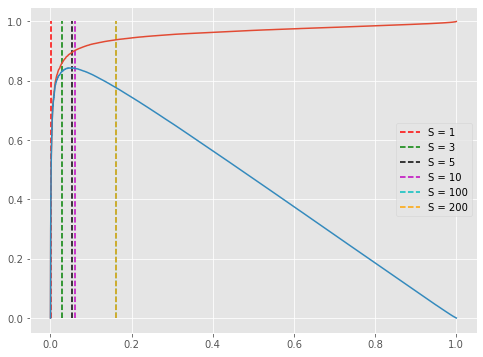

In [148]:
plt.style.use('ggplot');
plt.figure(figsize=(8, 6));
plt.plot(kl.x_normalized, kl.y_normalized);
plt.plot(kl.x_difference, kl.y_difference);
colors = ['r', 'g', 'k', 'm', 'c', 'orange']
for k, c, s in zip(norm_knees, colors, sensitivity):
    plt.vlines(k, 0, 1, linestyles='--', colors=c, label=f'S = {s}');
plt.legend();

15069
id          15069.000000
distance        0.099678
Name: 15069, dtype: float64


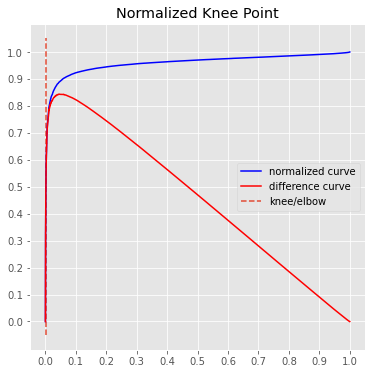

In [187]:
kn = KneeLocator(df.id,df.distance, curve='convex', direction='increasing', S=1)
print(kn.knee)
kn.plot_knee_normalized()
print(df.iloc[kn.knee])

In [ ]:
from sklearn.preprocessing import StandardScaler, normalize
X_normalized = pd.DataFrame(normalize(StandardScaler().fit_transform(X)))

In [240]:
# create function to plot DBSCAN clustering
from sklearn.cluster import DBSCAN
from sklearn import metrics

def plot_DBSCAN(db):
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

In [242]:
# find best hyperparameters for dbscan
def dbgridsearch(X, epsilon_list, sample_list):
    dict_list = []
    for epsilon in epsilon_list:
        for m_sample in sample_list:
            db = DBSCAN(eps=epsilon, min_samples=m_sample).fit(X)
            labels = db.labels_
            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise_ = list(labels).count(-1)
            s_score = metrics.silhouette_score(X, labels)
            results = {'epsilon':epsilon, \
                       'min_samples':m_sample, \
                       'n_clusters':n_clusters_, \
                       'n_noise':n_noise_, \
                       'silhouette':s_score}
            print(results)
            dict_list.append(results)
            
    return pd.DataFrame(dict_list)

In [250]:
epsilon_candidates = [0.05, 0.06, 0.09, 0.12, 0.15, 0.19]
min_samples = [5, 10, 25, 50, 200]
db_results = dbgridsearch(X_principal,epsilon_candidates, min_samples)

{'epsilon': 0.05, 'min_samples': 5, 'n_clusters': 7, 'n_noise': 112, 'silhouette': 0.5502448506583175}
{'epsilon': 0.05, 'min_samples': 10, 'n_clusters': 5, 'n_noise': 221, 'silhouette': 0.6678395596593322}
{'epsilon': 0.05, 'min_samples': 25, 'n_clusters': 5, 'n_noise': 748, 'silhouette': 0.6318385568296675}
{'epsilon': 0.05, 'min_samples': 50, 'n_clusters': 6, 'n_noise': 2050, 'silhouette': 0.521731941735692}
{'epsilon': 0.05, 'min_samples': 200, 'n_clusters': 3, 'n_noise': 9674, 'silhouette': -0.041004686407475587}
{'epsilon': 0.06, 'min_samples': 5, 'n_clusters': 4, 'n_noise': 72, 'silhouette': 0.7625314500362271}
{'epsilon': 0.06, 'min_samples': 10, 'n_clusters': 4, 'n_noise': 129, 'silhouette': 0.7625835305191563}
{'epsilon': 0.06, 'min_samples': 25, 'n_clusters': 4, 'n_noise': 393, 'silhouette': 0.7413639296338799}
{'epsilon': 0.06, 'min_samples': 50, 'n_clusters': 4, 'n_noise': 1116, 'silhouette': 0.687311839288392}
{'epsilon': 0.06, 'min_samples': 200, 'n_clusters': 3, 'n_nois

In [253]:
print(db_results.describe())

         epsilon  min_samples  n_clusters      n_noise  silhouette
count  30.000000    30.000000   30.000000    30.000000   30.000000
mean    0.110000    58.000000    4.166667   821.833333    0.681635
std     0.050172    73.947791    0.746640  2114.052801    0.168369
min     0.050000     5.000000    3.000000     0.000000   -0.041005
25%     0.060000    10.000000    4.000000     8.750000    0.696917
50%     0.105000    25.000000    4.000000    60.000000    0.738514
75%     0.150000    50.000000    4.000000   350.000000    0.761582
max     0.190000   200.000000    7.000000  9674.000000    0.772288


In [254]:
print(db_results.sort_values(by=['n_noise','epsilon']))
# sns.displot(data=db_results, x='silhouette', y='epsilon')
# sns.displot(data=db_results, x='n_clusters', y='silhouette')
# sns.scatterplot(data=db_results, x='epsilon', y='silhouette', hue='n_noise')

    epsilon  min_samples  n_clusters  n_noise  silhouette
20     0.15            5           4        0    0.772288
21     0.15           10           4        0    0.772288
25     0.19            5           4        0    0.772288
26     0.19           10           4        0    0.772288
27     0.19           25           4        0    0.772288
28     0.19           50           4        0    0.772288
22     0.15           25           4        3    0.731633
15     0.12            5           4        8    0.735664
16     0.12           10           4       11    0.733851
23     0.15           50           4       14    0.730821
10     0.09            5           4       18    0.748539
17     0.12           25           4       19    0.728738
29     0.19          200           4       21    0.725733
11     0.09           10           4       30    0.755455
18     0.12           50           4       48    0.757661
5      0.06            5           4       72    0.762531
12     0.09   

In [251]:
db = DBSCAN(eps=0.15, min_samples=10).fit(X_principal)

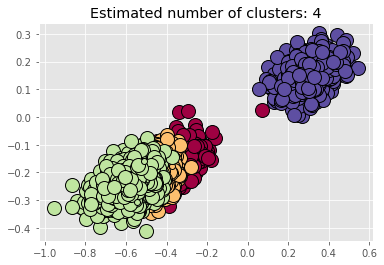

In [252]:
plot_DBSCAN(db)

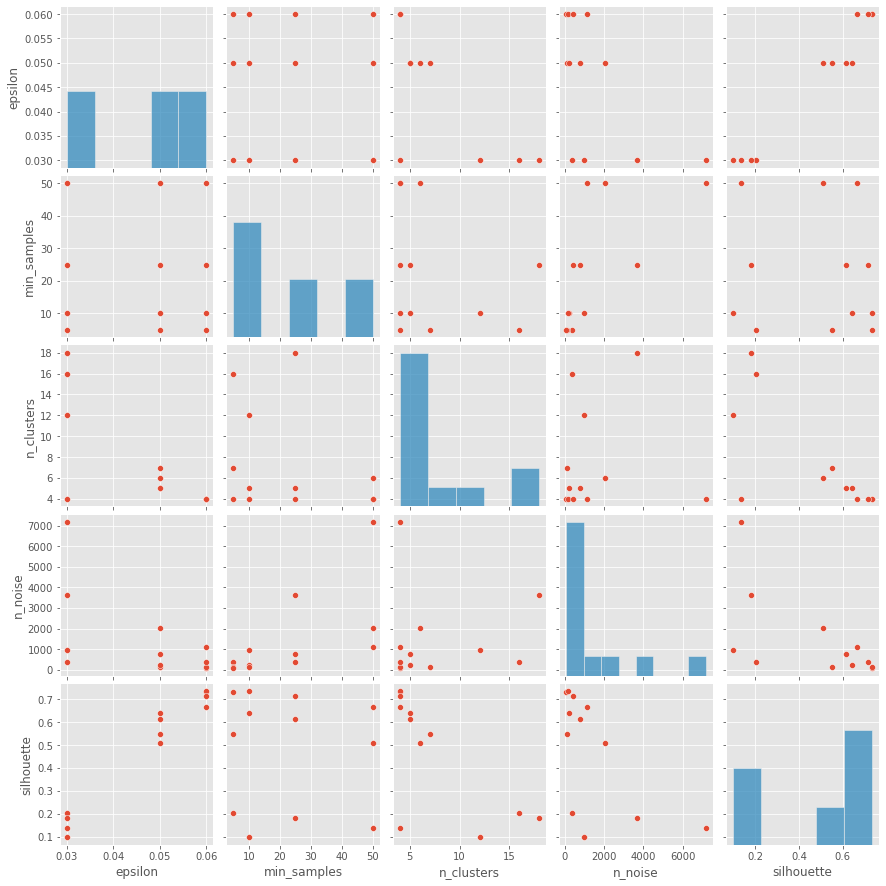

In [174]:
x = db_results.epsilon
y = db_results.silhouette
# sns.displot(data = db_results, x='n_clusters', y='silhouette')
sns.pairplot(data=db_results)

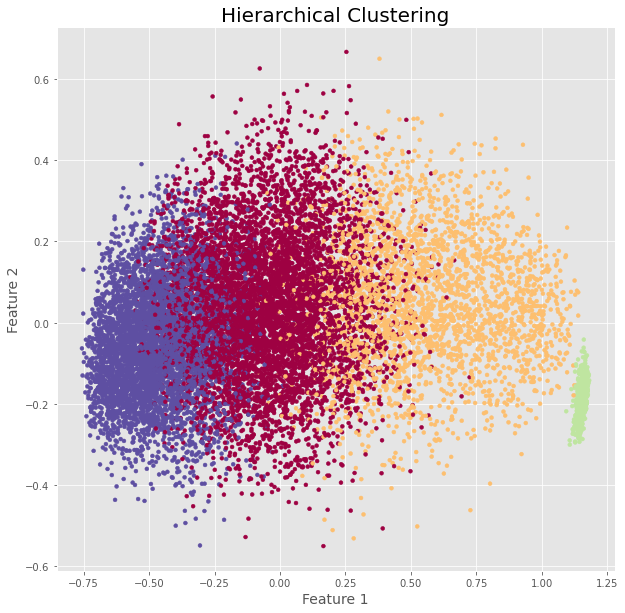

In [185]:
# clustering with hierarchical/agglomerative
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
model.fit(X_principal)

X_principal['HR_labels']=model.labels_

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(X_principal['P1'],X_principal['P2'],c=X_principal['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [40]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=)

SyntaxError: invalid syntax (<ipython-input-40-921dd7b9ceaf>, line 2)

In [ ]:
print(X.ndim)

In [ ]:
print(X.shape)

In [ ]:
print(X[0].ndim)

In [ ]:
print(X[0].shape)